# Курсовая работа    
  
## Выполнил студент Группы БФИ2205

Задачи работы:
Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате: | Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость | 

### Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.

Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск. Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями



### Ход работы:

Для начала подключаем необходимые нам библиотеки:

In [39]:
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt

Далее реализуем класс Хэш-таблицы:

In [40]:
class HashTable:
    def __init__(self, initial_size=20):
        self.size = initial_size
        self.keys = [None] * self.size
        self.values = [None] * self.size
        self.item_count = 0

    def hashFunction(self, key):
        return key % self.size

    def rehash(self):
        old_keys = self.keys
        old_values = self.values
        self.size *= 2
        self.keys = [None] * self.size
        self.values = [None] * self.size
        self.item_count = 0

        for i in range(len(old_keys)):
            if old_keys[i] is not None:
                self.put(old_keys[i], old_values[i])

    def put(self, key, data):
        if self.item_count == self.size:
            self.rehash()
        index = self.hashFunction(key)
        while self.keys[index] is not None:
            if self.keys[index] == key:
                self.values[index] = data
                return
            index = (index + 1) % self.size
        self.keys[index] = key
        self.values[index] = data
        self.item_count += 1

    def get(self, key):
        index = self.hashFunction(key)
        start_index = index
        while self.keys[index] is not None:
            if self.keys[index] == key:
                return self.values[index]
            index = (index + 1) % self.size
            if index == start_index:
                break
        return None

Создадим функцию, которая будет выполнять сортировку выбором:

In [41]:
def selection_sort(items, key=None):
    for i in range(len(items)):
        min_index = i
        for j in range(i + 1, len(items)):
            if key:
                if key(items[j]) < key(items[min_index]):
                    min_index = j
            else:
                if items[j] < items[min_index]:
                    min_index = j
        items[i], items[min_index] = items[min_index], items[i]
    return items

Создадим функцию для подсчёта общей выручки магазина:

In [42]:
def all_money(items):
    total_revenue = 0
    for item in items:
        total_revenue += float(item[1][6])
    return total_revenue

Создадим функцию для нахождения товара, который был продан больше всего раз:

In [43]:
def best_selling(items):
    sorted_items = selection_sort(items, key=lambda x: int(x[1][4]))  # сортируем по количеству продаж
    best_selling_product = sorted_items[-1][1][2]  # название товара с максимум продаж
    max_sales = int(sorted_items[-1][1][4])  # макс продаж
    return best_selling_product, max_sales

Создаём функцию для нахождения товара, который принёс больше всего выручки магазину:

In [44]:
def most_profitable(items):
    sorted_items = selection_sort(items, key=lambda x: float(x[1][5]) * int(x[1][4]))  # сортировка по выручке
    most_profitable_product = sorted_items[-1][1][2]  # название товара с макс выручкой
    max_revenue = float(sorted_items[-1][1][5]) * int(sorted_items[-1][1][4])  # макс выручка за товар
    return most_profitable_product, max_revenue

Теперь создаём функцию, которая будет генерировать отчёт по продажам для каждого товара:

In [45]:
def report_po_prodazham(items):
    product_reports = []

    total_revenue = all_money(items)

    for item in items:
        product = item[1][2]
        sales = int(item[1][4])
        revenue_percentage = (int(item[1][6]) / total_revenue) * 100
        product_reports.append((product, sales, revenue_percentage))

    # отчёты сортируются по возрастанию % от выручки
    sorted_product_reports = selection_sort(product_reports, key=lambda x: x[2])

    # также выводим общую выручку
    return sorted_product_reports, total_revenue

Прочтём все данные из CSV-файла и запишем их в хэш-таблицу:

In [46]:
hash_table = HashTable()
with open('table.csv', mode='r', encoding='utf-8', newline='') as file:
    reader = csv.reader(file, delimiter=';')
    header = next(reader)
    for row in reader:
        order_number = int(row[0])
        hash_table.put(order_number, row)

Извлекаем данные из таблицы для сортировки по номеру заказа:

In [47]:
# извлечение
items = []
for key in hash_table.keys:
    if key is not None:
        items.append((key, hash_table.get(key)))

# сортировка по номеру заказа
sorted_items = selection_sort(items)

Выводим отсортированные данные в виде таблицы:

In [48]:
table_data = [item[1] for item in sorted_items]
print(tabulate(table_data, headers=header, tablefmt="grid", stralign="center", numalign="center"))

+----------------+---------------+------------------------+--------------------+---------------------+------------------+-------------------+
|  ﻿Номер заказа  |  Дата заказа  |    Название товара     |  Категория товара  |  Количество продаж  |  Цена за единцу  |  Общая стоимость  |
+================+===============+========================+====================+=====================+==================+===================+
|      1001      |  19.02.2024   |   Samsung Galsxy S21   |     Смартфоны      |          5          |      64990       |      324950       |
+----------------+---------------+------------------------+--------------------+---------------------+------------------+-------------------+
|      1002      |  25.02.2024   |       Nikon D850       |    Фотоаппараты    |          4          |      245000      |      980000       |
+----------------+---------------+------------------------+--------------------+---------------------+------------------+-------------------+
|    

Выводим общую выручку магазина в виде таблицы:

In [49]:
total_revenue = all_money(sorted_items)
formatted_total_revenue = f"{total_revenue:,.2f}"
revenue_data = [["Общая выручка", formatted_total_revenue]]
print(tabulate(revenue_data, headers=["Показатель", "Значение"], tablefmt="grid", stralign="center", numalign="center"))

+---------------+--------------+
|  Показатель   |   Значение   |
+===============+==============+
| Общая выручка | 6,818,475.00 |
+---------------+--------------+


Выводим товар, который был продан больше всего раз:

In [50]:
best_selling_product, max_sales = best_selling(sorted_items)
best_selling_product_data = [["Самый продаваемый товар", best_selling_product, max_sales]]
print(tabulate(best_selling_product_data, headers=["Товар", "Количество продаж"], tablefmt="grid", stralign="center", numalign="center"))

+-------------------------+-------------------+---------------------+
|                         |       Товар       |  Количество продаж  |
+=========================+===================+=====================+
| Самый продаваемый товар | Apple MacBook Pro |          9          |
+-------------------------+-------------------+---------------------+


Выводим товар, который принёс больше всего выручки магазину:

In [51]:
most_profitable_product, max_revenue = most_profitable(sorted_items)
most_profitable_product_data = [["Самый прибыльный товар", most_profitable_product, max_revenue]]
print(tabulate(most_profitable_product_data, headers=["Товар", "Выручка"], tablefmt="grid", stralign="center", numalign="center"))

+------------------------+------------+-----------+
|                        |   Товар    |  Выручка  |
+========================+============+===========+
| Самый прибыльный товар | Nikon D850 |  980000   |
+------------------------+------------+-----------+


Создаёмотчёт для каждого товара и выводим в порядке возрастания доли выручки конкретного товара от всей выручки магазина:

In [52]:
product_reports, total_revenue = report_po_prodazham(sorted_items)
print("Отчеты по товарам:")
for report in product_reports:
    print(f"{report[0]} был продан {report[1]} раз, % от общей выручки {report[2]:.1f}%")

# вывод общей выручки
print(f"\nОбщая выручка магазина: {total_revenue:,.2f} руб.")

Отчеты по товарам:
Nike Air Max 90 был продан 1 раз, % от общей выручки 0.2%
Samsung Galsxy Watch 4 был продан 2 раз, % от общей выручки 0.9%
Adidas SuperStar был продан 4 раз, % от общей выручки 1.0%
Redmi Note 13 был продан 6 раз, % от общей выручки 1.2%
Nike Air Force 1 был продан 7 раз, % от общей выручки 1.7%
Bose QuietComfort 35 был продан 6 раз, % от общей выручки 2.4%
Samsung Galaxy Tab S7 был продан 4 раз, % от общей выручки 2.6%
Sony PlayStation 5 был продан 3 раз, % от общей выручки 2.7%
Apple AirPods Pro был продан 8 раз, % от общей выручки 3.3%
Sony WH-1000XM4 был продан 7 раз, % от общей выручки 3.4%
Sony Alpha A7 был продан 3 раз, % от общей выручки 3.9%
Dell XPS 13 был продан 6 раз, % от общей выручки 4.4%
HP Spectre x360 был продан 2 раз, % от общей выручки 4.6%
Samsung Galsxy S21 был продан 5 раз, % от общей выручки 4.8%
LG Smart TV был продан 4 раз, % от общей выручки 5.3%
Canon PowerShot G7 был продан 8 раз, % от общей выручки 10.5%
Canon EOS R6 был продан 3 раз, % 

Теперь создадим столбчатую диаграмму выручки за конкретный товар в % от общей выручки магазина:

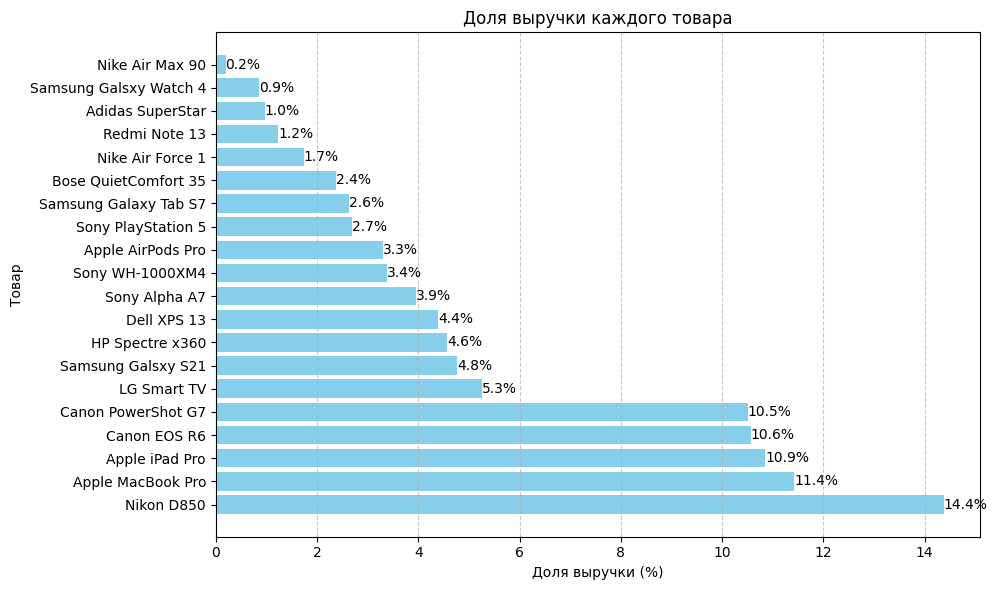

In [53]:
# создание списков с названием и выручкой товаров для диаграмм
products = [report[0] for report in product_reports]
revenues = [report[2] for report in product_reports]

# создаём фигуру с названием
plt.figure("Столбчатая диаграмма выручки в %", figsize=(10, 6))

# создание диаграммы
bars = plt.barh(products, revenues, color='skyblue')
plt.xlabel('Доля выручки (%)')
plt.ylabel('Товар')
plt.title('Доля выручки каждого товара')
# переворачиваем ось y чтобы самый маленький % был сверху, а большой снизу
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# добавляем легенду
for i in range(len(products)):
    plt.text(revenues[i], i, f'{revenues[i]:.1f}%', va='center', ha='left')

# отображаем диаграмму
plt.show()

Теперь создадим круговую диаграмму выручки за конкретный товар в % от общей выручки магазина:
Для неё мы используем списки, которые сделали для столбчатой диаграммы.

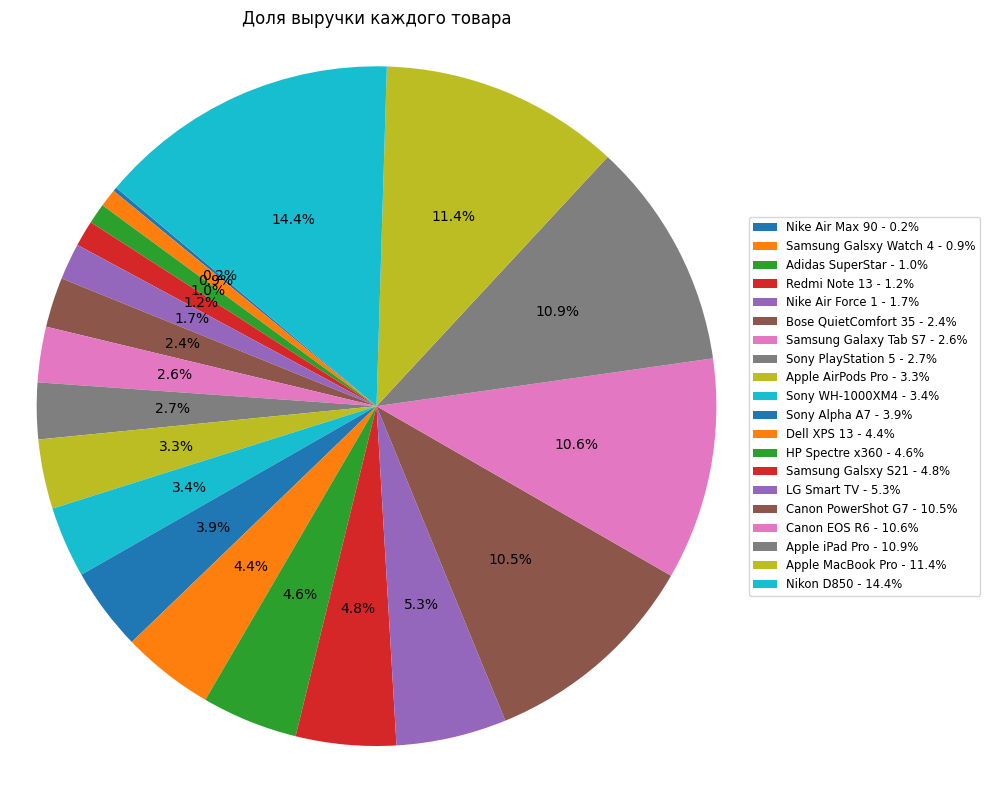

In [54]:
# создаём фигуру и название
plt.figure("Круговая диаграмма выручки в %", figsize=(10, 8))

# создаём круговую диаграмму
patches, _, _ = plt.pie(revenues, labels=[None]*len(products), startangle=140, autopct='%1.1f%%')

# создаём список подписей для легенды и её саму справа от диаграммы
legend_labels = [f'{product} - {revenue:.1f}%' for product, revenue in zip(products, revenues)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# добавляем заголовок
plt.title('Доля выручки каждого товара')

# затем отображаем диаграмму
plt.axis('equal')  # Для сохранения круговой формы
plt.tight_layout()
plt.show()

### Вывод:

Мы написали программу, которая считывает данные из CSV – файла, содержащего информацию о продажах товаров в магазине, а также разработали методы, которые позволяют нам рассчитать общую выручку магазина, найти товар, который был продан наибольшее количество раз, найти товар, который принёс наибольшую выручку магазину. Также мы написали метод, который составляет отчёт, содержащий в себе информацию об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в общей выручке.